# 1. Imports

In [19]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
from IPython.display import display, HTML

# 1. Quiz data

In [20]:
quiz_eval_df1 = pd.read_csv(r'../temp_data/quiz_eval_df.csv', sep = ';')
quiz_eval_df1 = quiz_eval_df1[(quiz_eval_df1["region"] != "Brazil")]
quiz_eval_df1 = quiz_eval_df1[(quiz_eval_df1["evaluation"] == "0") | (quiz_eval_df1["evaluation"] == "1")]
quiz_eval_df2 = pd.read_csv(r'../temp_data/quiz_eval_brazil_gpt_4.csv', sep=';')
quiz_eval_df = pd.concat([quiz_eval_df1, quiz_eval_df2], ignore_index=True)


quiz_eval_df["evaluation"] = quiz_eval_df["evaluation"].astype(int)

In [21]:
# Convert DataFrame to HTML with full text in cells
html = quiz_eval_df[(quiz_eval_df["model"]=="gpt_4_turbo") & (quiz_eval_df["region"]=="Brazil")][100:200].to_html(max_rows=None, max_cols=None)

# Display the DataFrame as a scrollable table
display(HTML('<div style="max-height: 600px; overflow-y: scroll;">' + html + '</div>'))


,question,template_answer,llm_answer,region,model,prompt,evaluation
12685,"Region: Brazil, Question: Quais são os principais arranjos para distribuição espacial do componente florestal em sistemas de ILPF nas regiões Centro-Oeste e Sudeste?","<p>A adoção da ILPF pode ser facilitada pela adequada distribuição espacial das árvores no terreno, visando às práticas de conservação do solo e água, ao favorecimento do trânsito de máquinas e à observância de aspectos comportamentais dos animais. Para tanto, o arranjo espacial mais simples e eficaz é o de renques (conjunto de linhas), no qual as árvores são plantadas em renques (formados por linhas simples, duplas, triplas, quádruplas, etc.) com espaçamentos amplos. Não é aconselhável a utilização de mais de três linhas de árvores nos renques por causa da dificuldade de manejo dos animais. A distribuição dos renques de plantio das árvores é realizada, preferencialmente (quando não houver restrições topográficas), no sentido leste-oeste e deverá ser em curvas de nível, quando a topografia for declivosa, para impedir a erosão do solo e a perda de água por escoamento superficial. Os espaçamentos maiores que 20 m entre renques são os mais indicados por promoverem menor sombreamento e menor competição por água e nutrientes para a cultura intercalar (grãos e ou pastagem). A escolha do espaçamento também deve ser planejada conforme as dimensões dos implementos agrícolas, facilitando, assim, as manobras e operações na área.</p>","A) Aleatório e linear \nB) Disperso e concentrado \nC) Linear, em clareiras e em blocos \nD) Mosaico e disperso",Brazil,gpt_4_turbo,Answer the given question. Return the LETTER of the correct answer.,0
12687,"Region: Brazil, Question: Quais são os principais arranjos para distribuição espacial do componente florestal em sistemas de ILPF nas regiões Centro-Oeste e Sudeste?","<p>A adoção da ILPF pode ser facilitada pela adequada distribuição espacial das árvores no terreno, visando às práticas de conservação do solo e água, ao favorecimento do trânsito de máquinas e à observância de aspectos comportamentais dos animais. Para tanto, o arranjo espacial mais simples e eficaz é o de renques (conjunto de linhas), no qual as árvores são plantadas em renques (formados por linhas simples, duplas, triplas, quádruplas, etc.) com espaçamentos amplos. Não é aconselhável a utilização de mais de três linhas de árvores nos renques por causa da dificuldade de manejo dos animais. A distribuição dos renques de plantio das árvores é realizada, preferencialmente (quando não houver restrições topográficas), no sentido leste-oeste e deverá ser em curvas de nível, quando a topografia for declivosa, para impedir a erosão do solo e a perda de água por escoamento superficial. Os espaçamentos maiores que 20 m entre renques são os mais indicados por promoverem menor sombreamento e menor competição por água e nutrientes para a cultura intercalar (grãos e ou pastagem). A escolha do espaçamento também deve ser planejada conforme as dimensões dos implementos agrícolas, facilitando, assim, as manobras e operações na área.</p>","A. Linhas simples ao longo dos rios \nB. Blocos aleatórios \nC. Mosaicos complexos \nD. Faixas ou linhas, blocos e mosaicos",Brazil,gpt_4_turbo,You are an expert in agriculture. Answer the given question about agriculture. Return the LETTER of the correct answer.,1
12689,"Region: Brazil, Question: Quais são os principais arranjos para distribuição espacial do componente florestal em sistemas de ILPF nas regiões Centro-Oeste e Sudeste?","<p>A adoção da ILPF pode ser facilitada pela adequada distribuição espacial das árvores no terreno, visando às práticas de conservação do solo e água, ao favorecimento do trânsito de máquinas e à observância de aspectos comportamentais dos animais. Para tanto, o arranjo espacial mais simples e eficaz é o de renques (conjunto de linhas), no qual as árvores são plantadas em renques (formados por linhas simples, duplas, triplas, quádruplas, etc.) com

In [22]:
quiz_eval_df[quiz_eval_df["model"]=="gpt_4_turbo"]

,question,template_answer,llm_answer,region,model,prompt,evaluation
9361,"Region: India, Question: Glycolysis is known a...",A,A. EMP pathway,India,gpt_4_turbo,Answer the given question. Return the LETTER o...,1
9363,"Region: India, Question: Glycolysis is known a...",A,A. EMP pathway,India,gpt_4_turbo,You are an expert in agriculture. Answer the g...,1
9365,"Region: India, Question: Glycolysis is known a...",A,A,India,gpt_4_turbo,You are an expert in agriculture. Answer the g...,1
9367,"Region: India, Question: Glycolysis is known a...",A,A. EMP pathway,India,gpt_4_turbo,You are an expert in agriculture. Answer the g...,1
9369,"Region: India, Question: Glycolysis is known a...",A,Thought: Glycolysis is a metabolic pathway tha...,India,gpt_4_turbo,You are an expert in agriculture. Answer the g...,0
...,...,...,...,...,...,...,...
12975,"Region: Brazil, Question: O que é a análise se...","<p>É a avaliação qualitativa do vinho, efetuad...",A) Um processo para determinar a idade das uva...,Brazil,gpt_4_turbo,Answer the given question. Return the LETTER o...,1
12977,"Region: Brazil, Question: O que é a análise se...","<p>É a avaliação qualitativa do vinho, efetuad...",D,Brazil,gpt_4_turbo,You are an expert in agriculture. Answer the g...,1
12979,"Region: Brazil, Question: O que é a análise se...","<p>É a avaliação qualitativa do vinho, efetuad...",D,Brazil,gpt_4_turbo,You are an expert in agriculture. Answer the g...,1
12981,"Region: Brazil, Question: O que é a análise se...","<p>É a avaliação qualitativa do vinho, efetuad...",E,Brazil,gpt_4_turbo,You are an expert in agriculture. Answer the g...,1


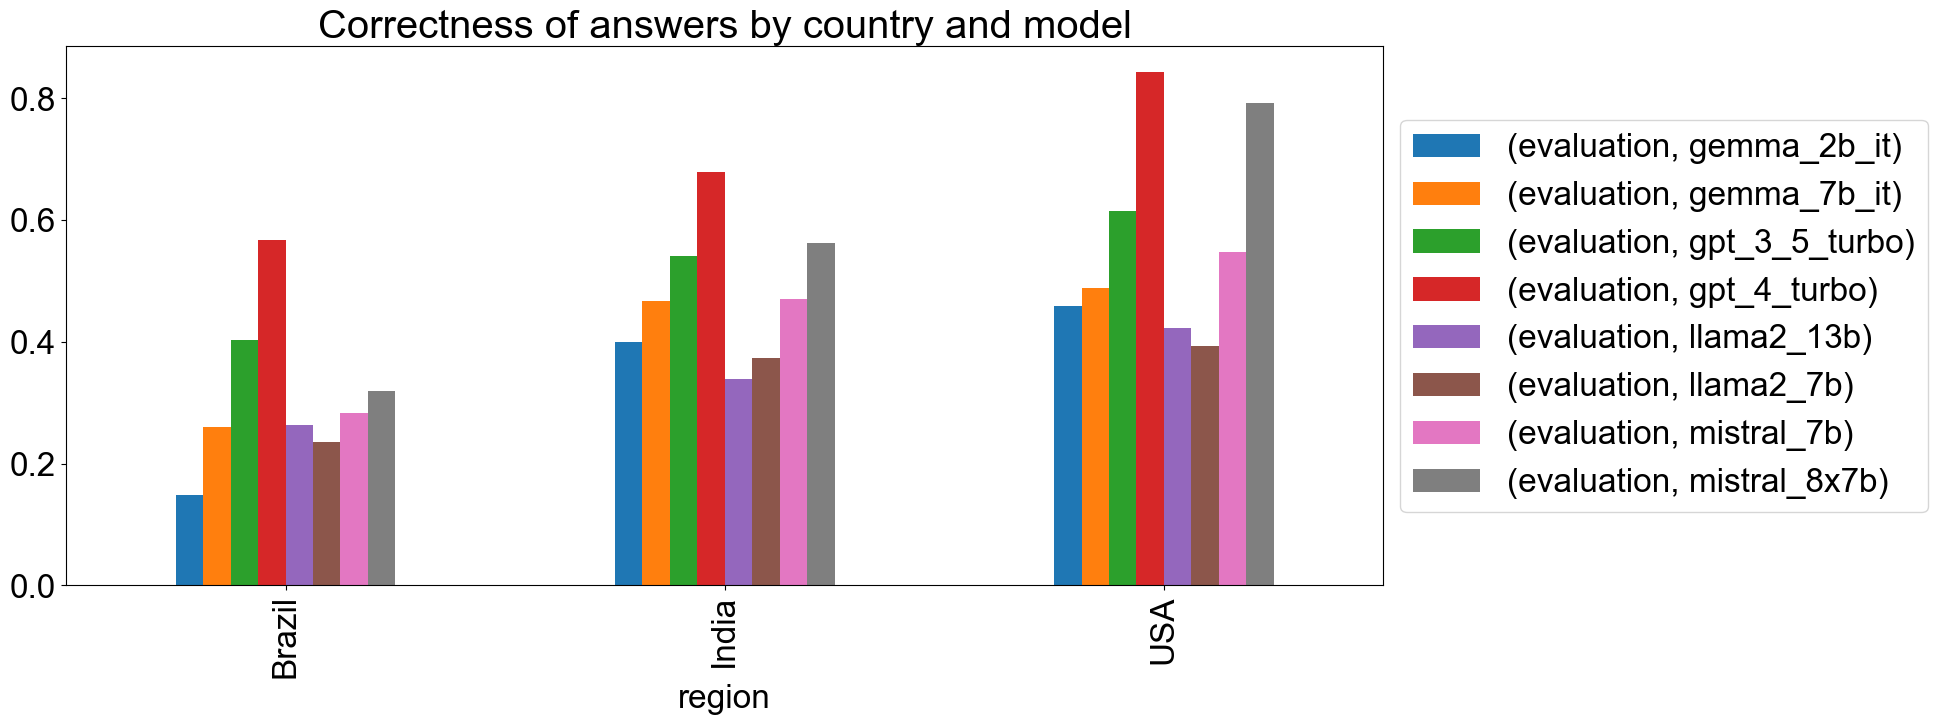

In [23]:
# get ratio
results_ratio = quiz_eval_df[["region", "evaluation", "model"]].groupby(['region', 'model']).mean() # results_sum / results_count

cmap = plt.cm.viridis

# Generate a list of colors from the 'viridis' colormap
colors = cmap(np.linspace(0, 1, 5))#results_ratio.shape[0]//2))

# Plot the data
ax = results_ratio.unstack().plot(kind='bar', stacked=False, figsize=(17, 7))
#ax = results_ratio.reset_index()[results_ratio.reset_index()["model"]!="gemma_2b_it"][["country", "error"]].groupby('country').mean().unstack().plot(kind='bar', stacked=False, figsize=(17, 7))
plt.title("Correctness of answers by country and model")

# Place the legend to the right of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [24]:
quiz_eval_df[["evaluation", "model"]].groupby('model').mean()

,evaluation
model,
gemma_2b_it,0.369961
gemma_7b_it,0.440949
gpt_3_5_turbo,0.527273
gpt_4_turbo,0.676064
llama2_13b,0.334439
llama2_7b,0.355679
mistral_7b,0.450138
mistral_8x7b,0.546158


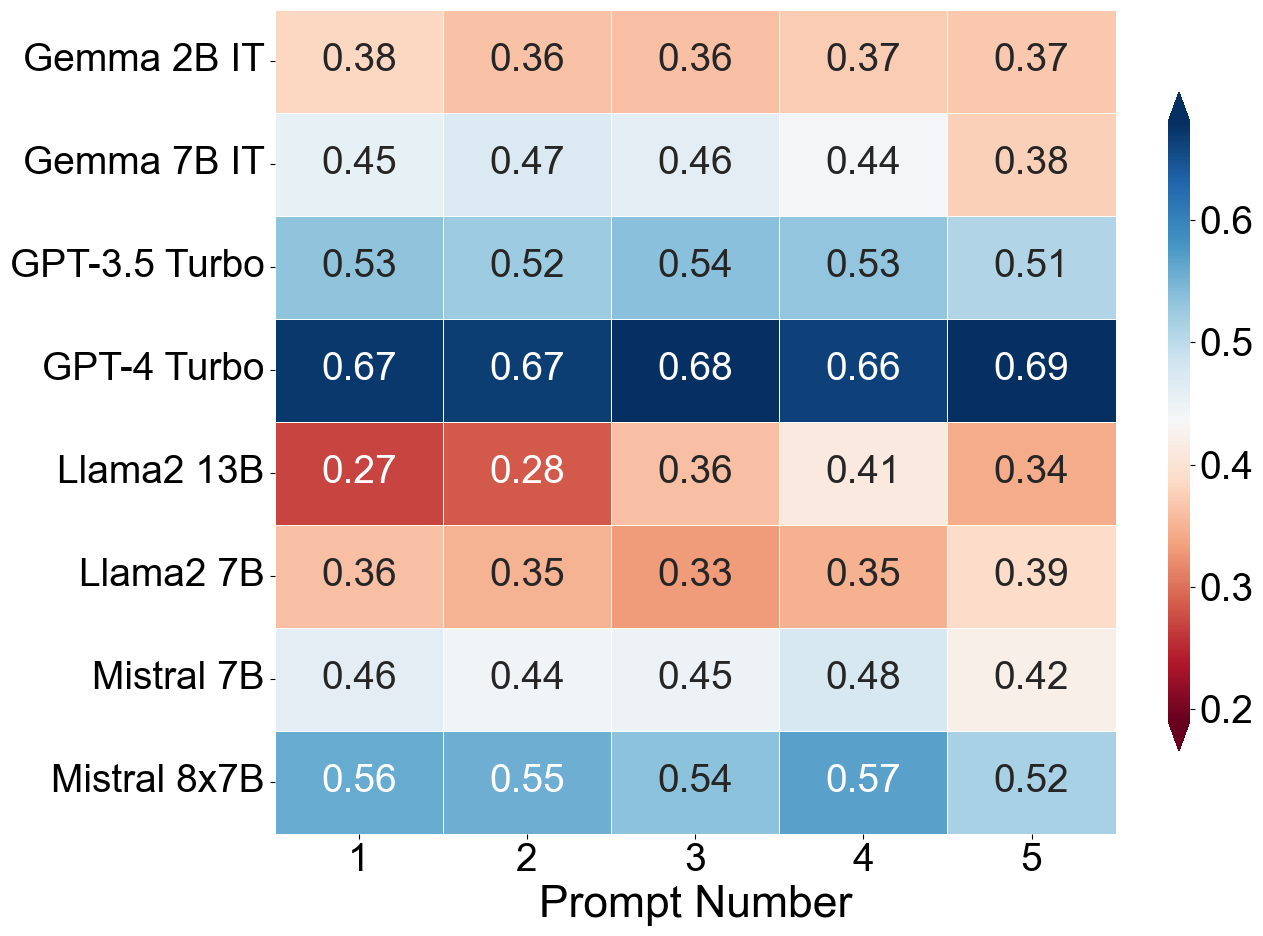

In [25]:
# Change font to Arial
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 28  # Set a larger base font size

model_name_mapping = {
    'gemma_2b_it': 'Gemma 2B IT',
    'gemma_7b_it': 'Gemma 7B IT',
    'gpt_3_5_turbo': 'GPT-3.5 Turbo',
    'gpt_4_turbo': 'GPT-4 Turbo',
    'llama2_13b': 'Llama2 13B',
    'llama2_7b': 'Llama2 7B',
    'mistral_7b': 'Mistral 7B',
    'mistral_8x7b': 'Mistral 8x7B'
}


# Create a new column 'prompt_length' with the length of each prompt
quiz_eval_df['prompt_length'] = quiz_eval_df['prompt'].str.len()

prompt_length_to_nr = {67: 1, 119: 2, 183: 3, 286: 4, 472: 5}

# prompt number column, from 1 to 5
quiz_eval_df['prompt_number'] = quiz_eval_df['prompt_length'].map(prompt_length_to_nr)

# Calculate the percentage of correct answers for each prompt_length-model combination
pivot_df = quiz_eval_df.groupby(['prompt_number', 'model']).evaluation.mean().reset_index()
pivot_df = pivot_df.pivot(index="model", columns="prompt_number", values="evaluation")

# Apply the model name mapping
pivot_df = pivot_df.rename(index=model_name_mapping)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 10))  # Increase figure size for better readability

# Create the heatmap using seaborn
sns.heatmap(pivot_df, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8, "aspect": 28, "extend": "both"}, annot_kws={"size": 28}, vmin = 0.19, vmax= 0.68)

# Set the plot labels with larger font size
ax.set_xlabel("Prompt Number", fontsize=32)
ax.set_ylabel("", fontsize=32)

# Remove the title
ax.set_title("")

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()



# 2. Synthetic Q&A

In [9]:
synth_qa_total_results_df = pd.read_csv('../temp_data/synth_qa_eval_gpt4_df.csv', sep = ';')
synth_qa_total_results_df

,question,template_answer,llm_answer,model,region,prompt,evaluation
0,"Region: australia_victoria, Question: What is ...",The major portion of value in faba bean stubbl...,"In Victoria, Australia, the major portion of v...",gpt_4_turbo,australia_victoria,You are an expert in agriculture. Answer the g...,0
1,"Region: australia_victoria, Question: What is ...",The major portion of value in faba bean stubbl...,The major portion of value in faba bean stubbl...,gpt_3_5_turbo,australia_victoria,You are an expert in agriculture. Answer the g...,0
2,"Region: australia_victoria, Question: When do ...","Livestock in Victoria, Australia primarily con...","In Victoria, Australia, livestock primarily co...",gpt_4_turbo,australia_victoria,You are an expert in agriculture. Answer the g...,0
3,"Region: australia_victoria, Question: When do ...","Livestock in Victoria, Australia primarily con...","Livestock in Victoria, Australia primarily con...",gpt_3_5_turbo,australia_victoria,You are an expert in agriculture. Answer the g...,0
4,"Region: australia_victoria, Question: What is ...",The optimal moisture level for harvest in soyb...,"In Victoria, Australia, the optimal moisture l...",gpt_4_turbo,australia_victoria,You are an expert in agriculture. Answer the g...,1
...,...,...,...,...,...,...,...
1995,"Region: usa_south_dakota, Question: What legal...","In South Dakota, USA, drainage outlets must no...","\n Sure, here's the information you request...",gemma_2b_it,usa,You are an expert in agriculture. Answer the g...,1
1996,"Region: usa_south_dakota, Question: What legal...","In South Dakota, USA, drainage outlets must no...",\n 1. NRCS Standards: The Natural Resources...,mistral_7b,usa,You are an expert in agriculture. Answer the g...,0
1997,"Region: usa_south_dakota, Question: What legal...","In South Dakota, USA, drainage outlets must no...","\n \nIn South Dakota, USA, drainage outlets...",mistral_8x7b,usa,You are an expert in agriculture. Answer the g...,1
1998,"Region: usa_south_dakota, Question: What legal...","In South Dakota, USA, drainage outlets must no...","As an expert in agriculture, I can provide y...",llama2_7b,usa,You are an expert in agriculture. Answer the g...,1


In [10]:
# Convert DataFrame to HTML with full text in cells
html = synth_qa_total_results_df[(synth_qa_total_results_df["model"]=="gpt_3_5_turbo") & (synth_qa_total_results_df["region"]=="australia_victoria")][:200].to_html(max_rows=None, max_cols=None)

# Display the DataFrame as a scrollable table
display(HTML('<div style="max-height: 600px; overflow-y: scroll;">' + html + '</div>'))

,question,template_answer,llm_answer,model,region,prompt,evaluation
1,"Region: australia_victoria, Question: What is the major portion of value in faba bean stubble and crop residue for grazing animals in Victoria, Australia?","The major portion of value in faba bean stubble and crop residue for grazing animals in Victoria, Australia lies in the grain remaining after harvest, not in the dead plant material.","The major portion of value in faba bean stubble and crop residue for grazing animals in Victoria, Australia is the protein content. Faba bean stubble and crop residue are high in protein, making them a valuable source of nutrition for grazing animals such as cattle and sheep.",gpt_3_5_turbo,australia_victoria,"You are an expert in agriculture. Answer the given question about agriculture truthfully, concisely, and precisely for the described location.",0
3,"Region: australia_victoria, Question: When do livestock primarily consume significant amounts of the faba bean plant material in Victoria, Australia?","Livestock in Victoria, Australia primarily consume significant amounts of the faba bean plant material when the grain becomes scarce.","Livestock in Victoria, Australia primarily consume significant amounts of faba bean plant material during the winter and spring months, from May to November. This is when faba beans are typically grown and harvested in the region, providing a key feed source for livestock.",gpt_3_5_turbo,australia_victoria,"You are an expert in agriculture. Answer the given question about agriculture truthfully, concisely, and precisely for the described location.",0
5,"Region: australia_victoria, Question: What is the optimal moisture level for harvesting soybean crops in Victoria, Australia, to prevent pod shattering and seed damage?","The optimal moisture level for harvest in soybean crops in Victoria, Australia is 13%, as lower levels can lead to pod shattering and cracking of seeds.","The optimal moisture level for harvesting soybean crops in Victoria, Australia, to prevent pod shattering and seed damage is around 13-15%. Harvesting soybeans at this moisture level helps to minimize losses from shattering pods and reduces damage to seeds during the harvesting process.",gpt_3_5_turbo,australia_victoria,"You are an expert in agriculture. Answer the given question about agriculture truthfully, concisely, and precisely for the described location.",1
7,"Region: australia_victoria, Question: Which insect pest can be a problem in linseed crops in Victoria, Australia, and how can it be effectively controlled?","Brown cutworms (Agrotis munda) can be a problem in linseed crops in Victoria, Australia, especially in spring sown crops. Effective control can be obtained by ground boom applied insecticides.","In Victoria, Australia, one insect pest that can be a problem in linseed crops is the green mirid bug. It can be effectively controlled by implementing integrated pest management strategies that include crop rotation, regular monitoring, use of beneficial insect predators, and selective insecticide application if necessary.",gpt_3_5_turbo,australia_victoria,"You are an expert in agriculture. Answer the given question about agriculture truthfully, concisely, and precisely for the described location.",0
9,"Region: australia_victoria, Question: What is the most serious disease of linseed crops in Victoria, Australia, and how can it be managed?","The most serious disease of linseed crops in Victoria, Australia is Fusarium wilt caused by the soil living fungus Fusarium oxysporum lini. It can be managed by using resistant varieties if possible and practicing crop rotation between flax type crops of two or three years.","The most serious disease of linseed crops in Victoria, Australia is powdery mildew. It can be managed through practices such as crop rotation, use of resistant varieties, timely fungicide applications, and maintaining good crop hygiene to reduce humidity levels and minimize disease spread.",gpt_3_5_t

In [12]:
synth_qa_total_results_df[["evaluation", "model"]].groupby(['model']).mean()

,evaluation
model,
gemma_2b_it,0.316
gemma_7b_it,0.400
gpt_3_5_turbo,0.516
gpt_4_turbo,0.636
llama2_13b,0.488
llama2_7b,0.404
mistral_7b,0.492
mistral_8x7b,0.496


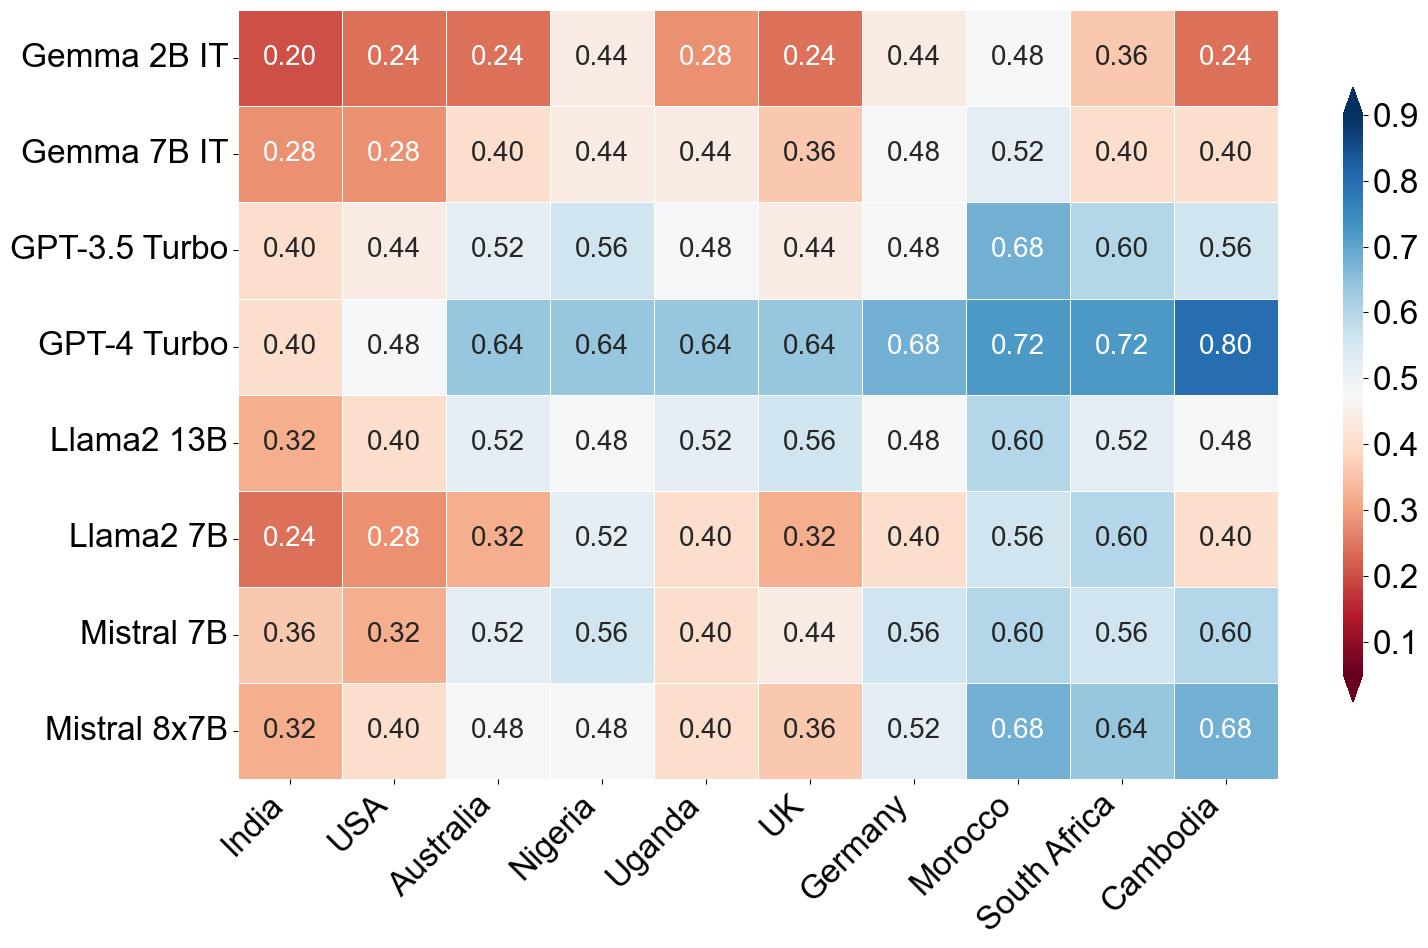

In [18]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 24  # Set a larger base font size

results_ratio = synth_qa_total_results_df[["region", "evaluation", "model"]].groupby(['region', 'model']).mean() # results_sum / results_count


# Pivot the DataFrame to have regions as rows and models as columns
pivot_df = results_ratio.unstack().rename(index=region_name_mapping, columns=model_name_mapping)
pivot_df.columns = pivot_df.columns.droplevel(0)
pivot_df.sort_values(by = "GPT-4 Turbo", axis = 0, inplace = True)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 10))  # Increase figure size for better readability

# Create the heatmap using seaborn
sns.heatmap(pivot_df.T, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8, "aspect": 28, "extend": "both"}, annot_kws={"size": 20}, vmin=0.05, vmax=0.9)

# Set the plot labels with larger font size
ax.set_xlabel("", fontsize=24)
ax.set_ylabel("", fontsize=24)

#plt.xticks(rotation=45, ha='right', fontsize = 24)

plt.xticks(fontsize = 24, rotation=45, ha='right')
plt.yticks(fontsize = 24)

# Remove the title
ax.set_title("")

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()


In [36]:
results_ratio = synth_qa_total_results_df[["question", "evaluation", "model"]]

pivot_df = results_ratio.pivot_table(index='question', columns='model', values='evaluation')

# Compute correlations between model results across regions
correlations = pivot_df.corr()


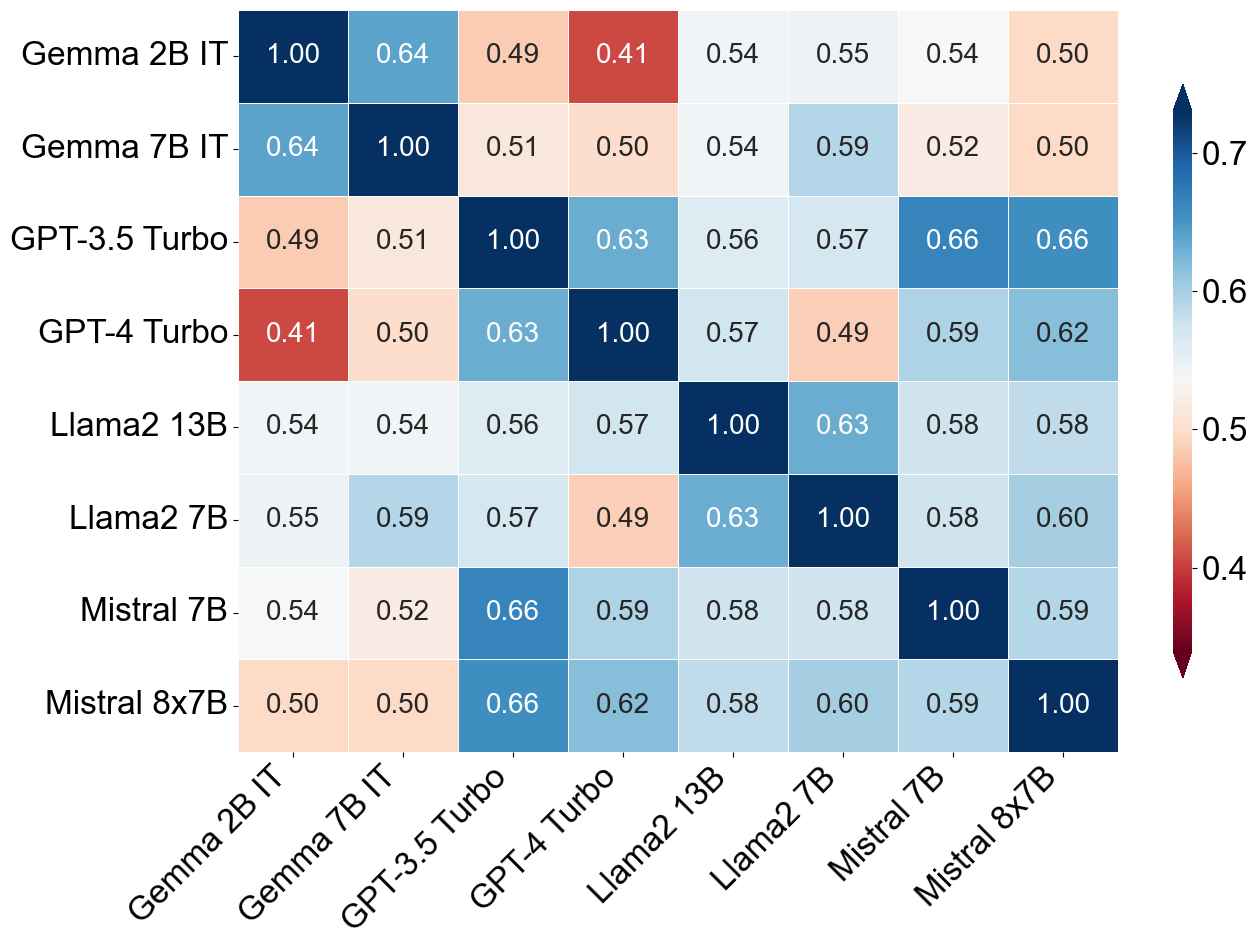

In [90]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 24  # Set a larger base font size

# Define a mapping for model names to a more professional format
model_name_mapping = {
    'gemma_2b_it': 'Gemma 2B IT',
    'gemma_7b_it': 'Gemma 7B IT',
    'gpt_3_5_turbo': 'GPT-3.5 Turbo',
    'gpt_4_turbo': 'GPT-4 Turbo',
    'llama2_13b': 'Llama2 13B',
    'llama2_7b': 'Llama2 7B',
    'mistral_7b': 'Mistral 7B',
    'mistral_8x7b': 'Mistral 8x7B'
}

# Apply the model name mapping to both the index and columns
correlations = correlations.rename(index=model_name_mapping, columns=model_name_mapping)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 10))  # Increase figure size for better readability

# Create the heatmap using seaborn, with the color map 'YlGnBu' min set to 0.45 and max set to 0.85
heatmap = sns.heatmap(correlations, annot=True, cmap="RdBu", fmt=".2f", linewidths=0.5, 
                      cbar_kws={"shrink": 0.8, "aspect": 28, "extend": "both"}, vmin=0.34, vmax=0.73, annot_kws={"size": 20})

# Remove axis labels
ax.set_xlabel("", fontsize=24)
ax.set_ylabel("", fontsize=24)

# Rotate labels by 45 degrees
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Manually set the color bar ticks
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks(np.arange(0.4, 0.90, 0.1))

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()
